In [6]:
#lets start by importing the libraries needed for this project.
#if the following libraries are not available in your work environment, please install them from 
#Anacaonda Navigator -> Environments OR you can install using pip
#>>>pip install pandas
#>>>pip install seaborn
#>>>pip install matplotlib

# pandas is used for data processing
import pandas as pd

# current version of seaborn generates a bunch of warnings that we'll ignore
import warnings
warnings.filterwarnings("ignore")

#matplot lib and seaborn is used for Stastical data visualization
import matplotlib.pyplot as plt
import seaborn as sb

# if your graphs are not shown after executing .plot extension and the output is similar to
# "<matplotlib.axes._subplots.AxesSubplot at 0x2e4664d88d0>", please use the following code to display the graphs. 
%matplotlib notebook
%matplotlib inline

In [3]:
# to read data from csv we use read.csv() function and store the data into a dataframe.

df_iris=pd.read_csv('C:\Lectures\DataVisualization\Project1\iris-species\Iris.csv')

#to display rows of the data set
# first 10 values
df_iris.head(10)

# or last 10 values
df_iris.tail(10)

#The output shows the contents of the CSV with header and indexes

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
# if we want to read only specific coulmns of a data frame
df1_iris=df_iris.loc[:,"SepalLengthCm":"Species"]
df1_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Lets see the types of values and their respective counts under column Species
df1_iris["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

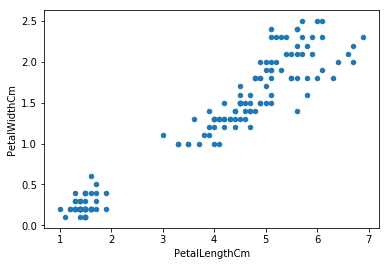

In [7]:
# to plot any type of charts we use .plot extension from matplotlib. 
#lets plot scatter plot using 'kind' parameter
df_iris.plot(x='PetalLengthCm',y='PetalWidthCm',kind='Scatter')

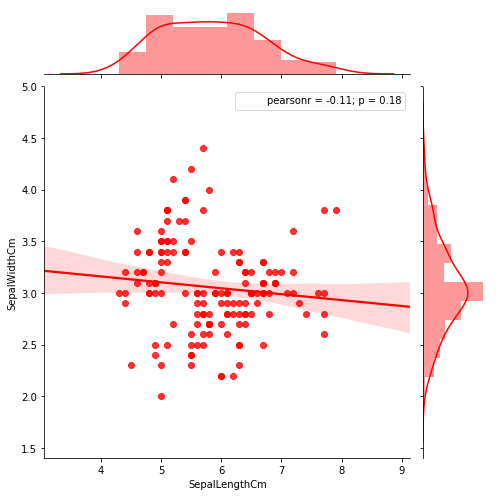

In [8]:
# Using seaborn lib to make a scatter plot.
#seaborn lib calls it as 'jointplot' and also shows histograms accross axis in the same plot.
#kind=reg adds regression and kernel density fits
sb.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df_iris, size=7, kind='reg',color='red')
#kind=hex replace the scatterplot with a joint histogram using hexagonal bins
#sb.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df_iris, size=7, kind='hex',color='red')


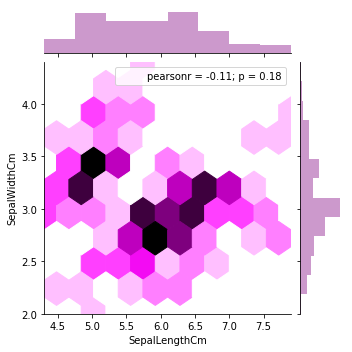

In [9]:
#kind=hex replace the scatterplot with a joint histogram using hexagonal bins
sb.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df_iris, size=5,ratio=5, kind='hex',color='purple')

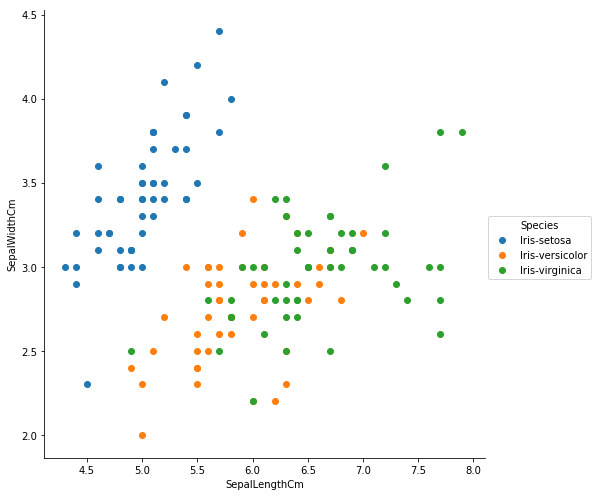

In [10]:
#FacetGrid is used to draw plots with multiple Axes where each Axes shows the same relationship conditioned on
#different levels of some variable. It's possible to condition on up to three variables by assigning variables 
#to the rows and columns of the grid and using different colors for the plot elements
#Here we have assign SepalLengthCm and SepalWidthCm t 
sb.FacetGrid(df_iris, hue='Species',size=7).map(plt.scatter,'SepalLengthCm', 'SepalWidthCm').add_legend()

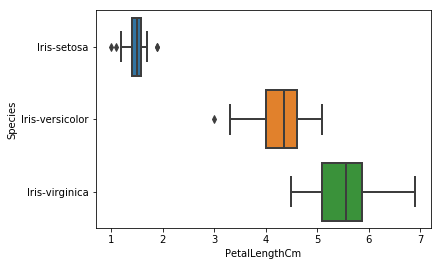

In [11]:
# TBD
sb.boxplot(x='PetalLengthCm',y='Species',data=df_iris,linewidth=2)

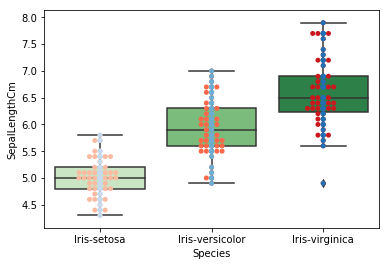

In [12]:
#A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons 
#between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the 
#whiskers extend to show the rest of the distribution,except for points that are determined to be "outliers" using a method 
#that is a function of the inter-quartile range.
   
#stripplot : A scatterplot where one variable is categorical. Can be used in conjunction with other plots.
#swarmplot : A categorical scatterplot where the points do not overlap. Can be used with other plots.

sb.boxplot(x="Species", y="SepalLengthCm", data=df_iris,orient="v",saturation=0.8, palette='Greens')
sb.swarmplot(x="Species", y="SepalLengthCm", data=df_iris,orient="v",palette='Reds')
sb.stripplot(x="Species", y="SepalLengthCm", data=df_iris,orient="v",palette='Blues')

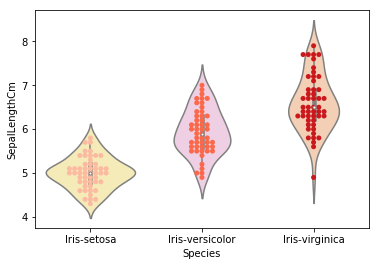

In [13]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sb.swarmplot(x="Species", y="SepalLengthCm", data=df_iris,palette='Reds')
sb.violinplot(x="Species", y="SepalLengthCm", data=df_iris,palette='Pastel2_r')

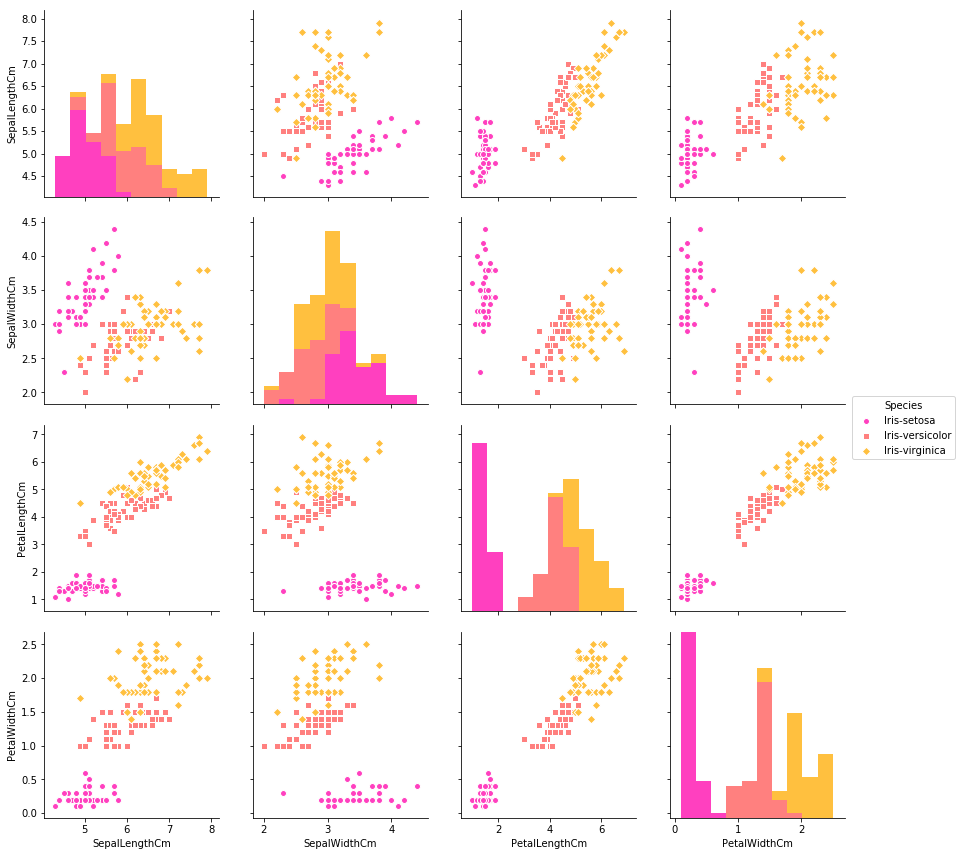

In [14]:
# pairplot shows the bivariate relation between each pair of features
# markers :defines the type pf marker(round,square,diamond) to repersent each Species here
sb.pairplot(df_iris.drop("Id", axis=1), hue="Species", size=3,palette='spring',markers=["o", "s", "D"],\
            )

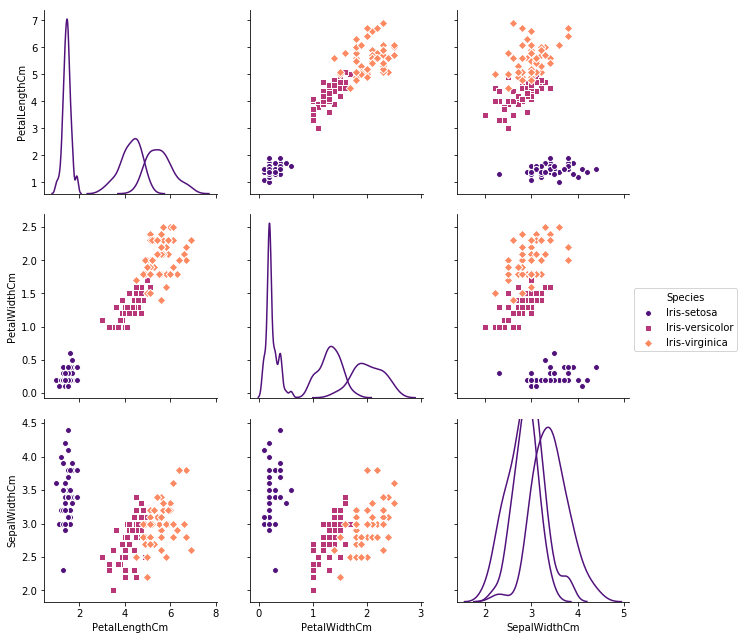

In [15]:
# if we want to use only specifc coulums to do pairplot, we can do so by defining them in the 'vars' parameter
#use diag_king (kde/reg/jointplot) to set a different type plot only for the diagonal charts.
sb.pairplot(df_iris.drop("Id", axis=1), hue="Species", size=3,palette='magma',markers=["o", "s", "D"],\
            vars=["PetalLengthCm",'PetalWidthCm','SepalWidthCm'],diag_kind='kde')

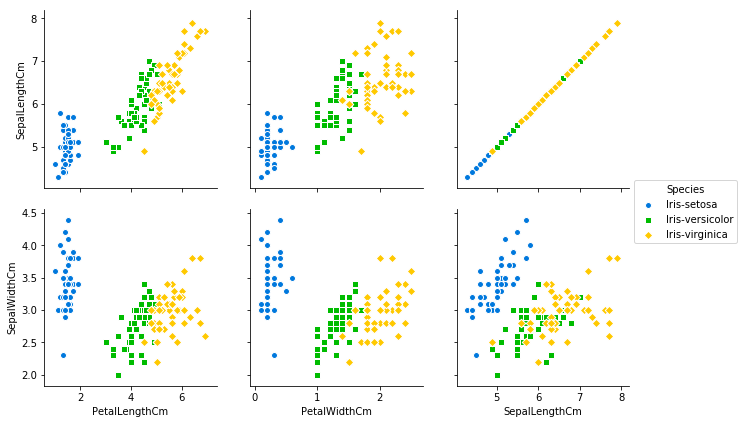

In [16]:
# we can specify x_var and y_var to get specific plots insted of getting all the columns plotted agsinst each one.
sb.pairplot(df_iris.drop("Id", axis=1), hue="Species", size=3,palette='nipy_spectral',markers=["o", "s", "D"],\
            x_vars=["PetalLengthCm",'PetalWidthCm','SepalLengthCm'],\
            y_vars=["SepalLengthCm","SepalWidthCm"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA8D7E0A90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001BA8D911B38>]], dtype=object)

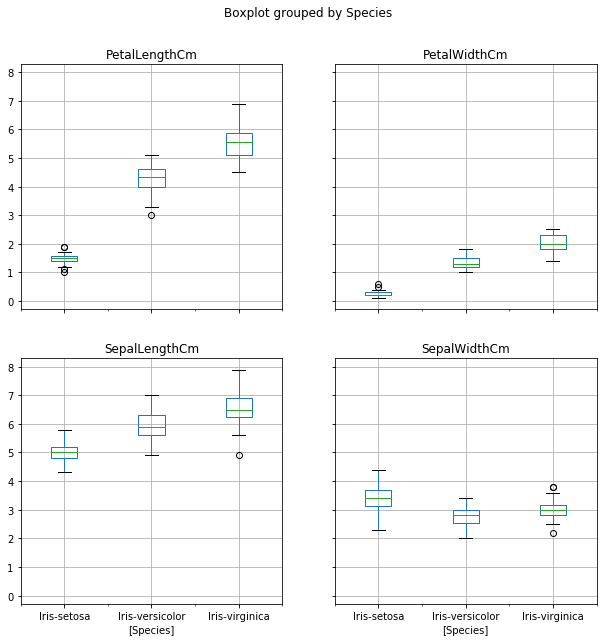

In [21]:
# We can quickly make a boxplot with Pandas on each feature split out by species
#figsize decides the size of each plot
df_iris.drop("Id", axis=1).boxplot(by="Species", figsize=(10, 10))

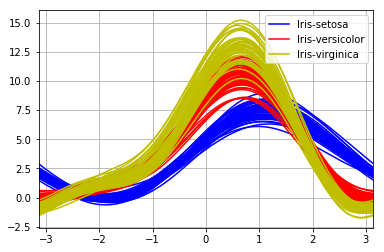

In [22]:
# Andrews curves allow one to plot multivariate data as a large number of curves that are created 
# using the attributes of samples as coefficients for Fourier series. 
# By coloring these curves differently for each class it is possible to visualize data clustering. 
# Curves belonging to samples of the same class will usually be closer together and form larger structures

from pandas.tools.plotting import andrews_curves
andrews_curves(df_iris.drop("Id", axis=1), "Species",color='bry')

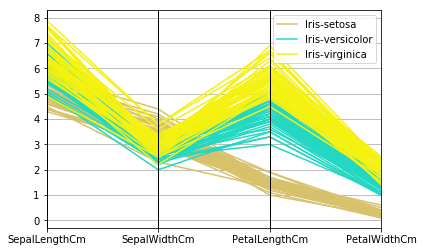

In [23]:
#Using parallel coordinates points are represented as connected line segments. Each vertical line represents one attribute. 
#One set of connected line segments represents one data point. Points that tend to cluster will appear closer together.
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(df_iris.drop("Id", axis=1), "Species")

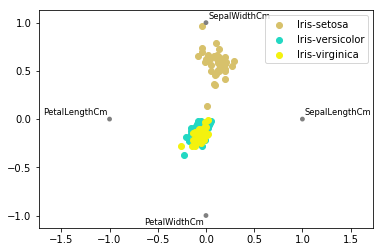

In [26]:
from pandas.tools.plotting import radviz
radviz(df_iris.drop("Id", axis=1), "Species")

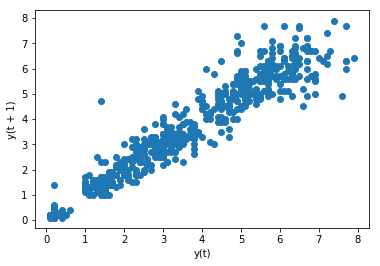

In [27]:
# lag_plot is provided by panda 
# Lag plots are used to check if a data set or time series is random. 
# Random data should not exhibit any structure in the lag plot. Non-random structure implies that the
# underlying data are not random.
from pandas.tools.plotting import lag_plot
df1_iris=pd.read_csv('C:\Lectures\DataVisualization\Project1\iris-species\Iris.csv',\
                 usecols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
lag_plot(df1_iris)

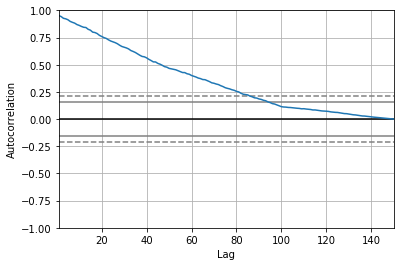

In [28]:
#Autocorrelation plots are often used for checking randomness in time series. 
#This is done by computing autocorrelations for data values at varying time lags. 
#If time series is random, such autocorrelations should be near zero for any and all time-lag separations. 
# If time series is non-random then one or more of the autocorrelations will be significantly non-zero. 
# The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands. 
# The dashed line is 99% confidence band.
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1_iris)